# Exploratory Data Analysis in Python

Source: <a href="https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce">Towards Data Science</a> | 
Dataset: <a href="https://www.kaggle.com/CooperUnion/cardataset">Car Features and MSRP</a>

### What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics often using statistical graphs and other data visualization methods. Through the process of EDA, we can get a better understanding of the data set variables and the relationship between them, making it easier to discover patterns, detect outliers and anomalies, and test underlying assumptions.




### 1. Importing libraries

In [1]:
# Importing libraries
import pandas as pd # data analysis and manipulation
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 
sns.set(color_codes = True)

### 2. Loading data

In [2]:
df = pd.read_csv("data.csv")

Next we’ll want to check the first few rows of the data set to get an ideia of what we’ll be working with.

In [3]:
print('Data set dimension: ', df.shape) # display the dimension of the dataset

df.head() # display the top 5 rows

Data set dimension:  (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail() # display the last 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 3. Renaming the columns

I personally prefer to rename all columns in the beginning of the EDA whenever possible, making sure they are following the best practices for variable and method naming (e.g. lowercase, no special characters, etc). This typically makes them easier to read and understand.

In [13]:
# Renaming the column names
df = df.rename(columns = {'Make' : 'make', 'Model' : 'model', 'Engine HP' : 'hp', 'Year' : 'year', 
                          'Engine Cylinders' : 'cylinders', 'Transmission Type' : 'transmission', 
                          'Driven_Wheels' : 'drive_mode', 'highway MPG' : 'mpg_h', 'city mpg' : 'mpg_c', 
                          'MSRP' : 'price', "Engine Fuel Type" : "fuel_type", "Number of Doors" : "doors",
                          'Market Category' : "market_category", "Vehicle Size" : "size", 
                          "Vehicle Style" : "style", 'Popularity' : 'popularity'})
df.head()

,make,model,year,fuel_type,hp,cylinders,transmission,drive_mode,doors,market_category,size,style,mpg_h,mpg_c,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 4. Dropping duplicate rows

In [6]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("Numer of duplicate rows: ", duplicate_rows_df.shape)

Numer of duplicate rows:  (715, 16)


In [7]:
df = df.drop_duplicates()
df.count()

make                11199
model               11199
year                11199
Engine Fuel Type    11196
hp                  11130
cylinders           11169
transmission        11199
drive_mode          11199
Number of Doors     11193
Market Category      7823
Vehicle Size        11199
Vehicle Style       11199
mpg_h               11199
mpg_c               11199
Popularity          11199
price               11199
dtype: int64

### 5. Checking for missing or null values

In [8]:
print('Null fields:\n', df.isnull().sum().sort_values(ascending=False)) # show the columns in order from most missing to least

Null fields:
 Market Category     3376
hp                    69
cylinders             30
Number of Doors        6
Engine Fuel Type       3
price                  0
Popularity             0
mpg_c                  0
mpg_h                  0
Vehicle Style          0
Vehicle Size           0
drive_mode             0
transmission           0
year                   0
model                  0
make                   0
dtype: int64


At this point, it is important to understand if the missing data means something and if it should be replaced or dropped.

- Do they have anything in common? Same model, make?<br>
- Are there any market categories that were not available in the system to choose from?<br>

In [9]:
df[df.isnull().any(axis=1)] # Display rows with one or more NaN values

,make,model,year,Engine Fuel Type,hp,cylinders,transmission,drive_mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,mpg_h,mpg_c,Popularity,price
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
203,Chrysler,300,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,37570
204,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,31695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,NaN,Compact,Coupe,23,16,640,2000
11809,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2031,15950
11810,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,32,2031,17050
11867,GMC,Yukon,2015,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,4dr SUV,21,15,549,64520


In [15]:
df = df.dropna()
df.count()

make               7735
model              7735
year               7735
fuel_type          7735
hp                 7735
cylinders          7735
transmission       7735
drive_mode         7735
doors              7735
market_category    7735
size               7735
style              7735
mpg_h              7735
mpg_c              7735
popularity         7735
price              7735
dtype: int64

### 6. Checking data types

In [16]:
print('Data type: ', df.dtypes) # check the data type

Data type:  make                object
model               object
year                 int64
fuel_type           object
hp                 float64
cylinders          float64
transmission        object
drive_mode          object
doors              float64
market_category     object
size                object
style               object
mpg_h                int64
mpg_c                int64
popularity           int64
price                int64
dtype: object


It is important to make sure the MSRP (manufacturer's suggested retail price) is stored as an integer because we will be using this variable to plot the data via a graph. In this case, the MSRP is already an integer (int64), so there is no need to convert its type.

### 7. Identifying irrelevant columns


In [18]:
# Drop columns Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size

df = df.drop(['fuel_type', 'market_category', 'style', 'popularity', 'doors', 'size'], axis = 1)
df.head()

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 8. Detecting Outliers

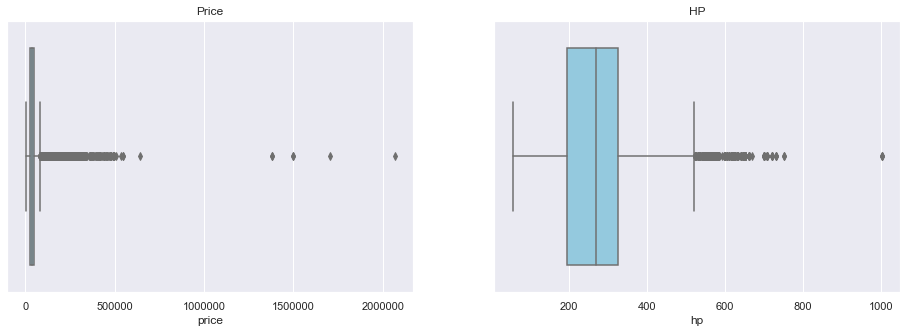

In [19]:
fig, ax = plt.subplots(1,2, figsize = (16,5))
ax = sns.boxplot(x = 'price', data = df, ax = ax[0], color = 'skyblue').set_title('Price')
ax = sns.boxplot(x = 'hp', data = df, color = 'skyblue').set_title('HP')

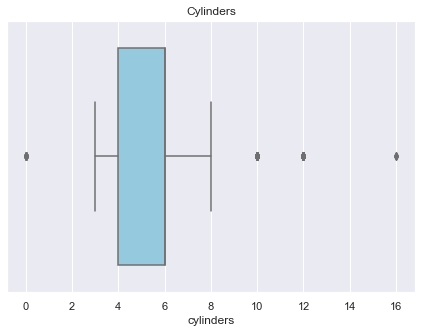

In [20]:
fig, ax = plt.subplots(figsize = (7.3,5))
X = sns.boxplot(x = 'cylinders', data = df, color = 'skyblue').set_title('Cylinders')

In [21]:
# Calculate Quantile and Interquantile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year             6.0
hp             131.0
cylinders        2.0
mpg_h            8.0
mpg_c            6.0
price        23252.5
dtype: float64


Interquartile range (IQR) is a measure of where the “middle fifty” is in a data set. In other words, an interquartile range is a measure of where the bulk of the values lie (source: <a href="https://www.statisticshowto.com/probability-and-statistics/interquartile-range/">Statistics How To</a>).

### 9. Removing Outliers

In [22]:
print("Shape before dropping outliers: ", df.shape)
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after dropping outliers: ", df.shape)

Shape before dropping outliers:  (7735, 10)
Shape after dropping outliers:  (6046, 10)


The <b>bitwise operator</b> ~ (pronounced as tilde) is a complement operator. It takes one bit operand and returns its complement. If the operand is 1, it returns 0, and if it is 0, it returns 1 (source: <a href="https://www.tutorialspoint.com/What-is-tilde-operator-in-Python">Tutorials Point</a>).

## Data exploration

### Histogram

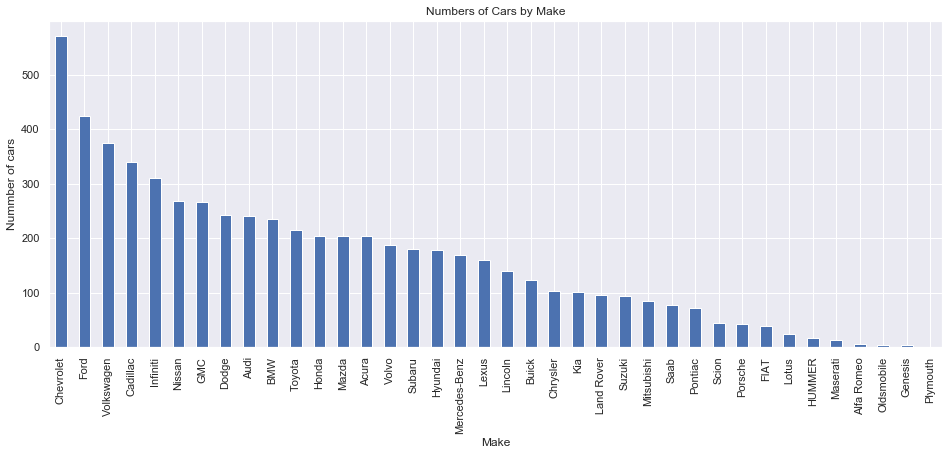

In [23]:
# Histogram

df.make.value_counts().nlargest(40).plot(kind='bar', figsize=(16,6))
plt.title('Numbers of Cars by Make')
plt.ylabel('Nummber of cars')
plt.xlabel('Make');

### Heat Map

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,year,hp,cylinders,mpg_h,mpg_c,price
year,1.000000,0.161893,-0.167933,0.322547,0.297484,0.217524
hp,0.161893,1.000000,0.761467,-0.549005,-0.639403,0.748951
cylinders,-0.167933,0.761467,1.000000,-0.716896,-0.755067,0.503612
mpg_h,0.322547,-0.549005,-0.716896,1.000000,0.925307,-0.299378
mpg_c,0.297484,-0.639403,-0.755067,0.925307,1.000000,-0.370670
price,0.217524,0.748951,0.503612,-0.299378,-0.370670,1.000000


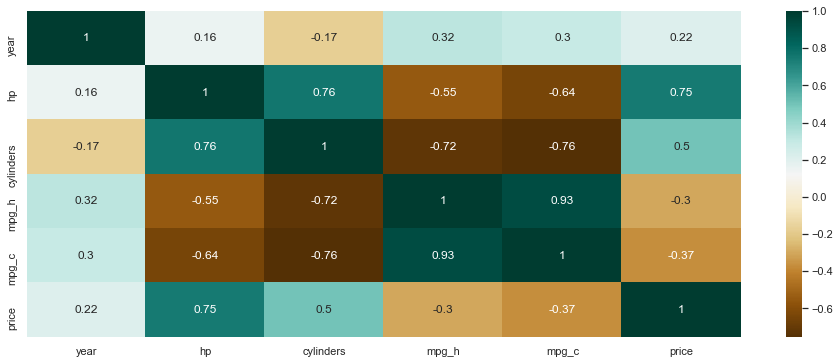

In [24]:
# Finding the relations between the variables
plt.figure(figsize = (16, 6))
c = df.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

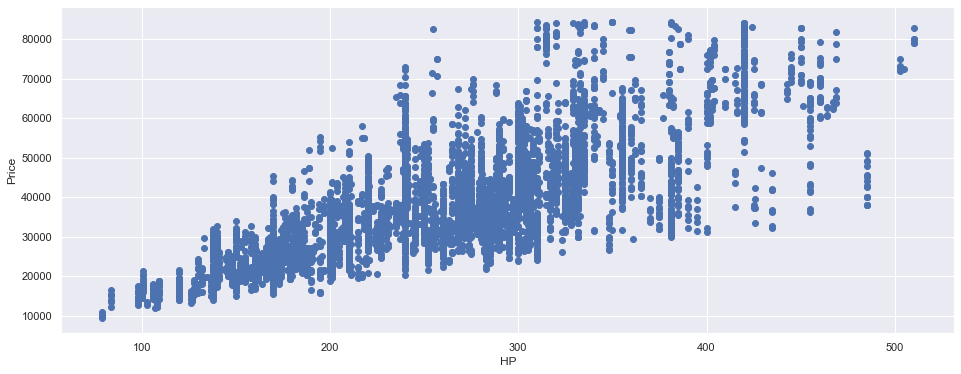

In [25]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df['hp'], df['price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Engineering Statistics Handbook https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm<br>
Exploratory Data Analysis in Python https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce